# HDBSCAN (Hierarquical DBSCAN)

Como funciona:

Este metodo es una extension de DBSCAN, permitiendo detectar clusters con densidades variables. No es necesario definir eps, ya que construye un árbol jerarquico basado en densidad minima. Devuelve una partición optimizada a partir del árbol.

Al igual que en el jerarquico cada cluster inicial es un punto, todos los puntos están unidos entre si y el peso de cada arista es el máximo entre las distancias core de los dos puntos y la distancia entre ellos. A través de estas de estas aristas con peso se construye un árbol jerárquico de densidad minima usando Minimum Spanning Tree (MST). Luego, se seleccionan los clusters estables a través de considerar una persistencia de densidad y luego el corte respectivo del árbol.

Este método también hace etiquetado de outliers.

*Distancia core:* La distancia core de un punto es la distancia al k-esimo vecino mas cercano, donde k=min_samples. Mide cuán denso es el vecindario del punto.

Así la distancia mutua se asegura de que los puntos que viven en zoncas poco densas estén lejos en el grafo, aunque espacialmente no lo estén.

Carguemos las librerías a utilizar para el desarrollo del modelo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import hdbscan

Carguemos el dataset a utilizar.

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target

Preprocesamiento.

In [ ]:
X_scaled = StandardScaler().fit_transform(X)
X_reduced = PCA(n_components=2).fit_transform(X_scaled)

En este caso, utilizaremos los datos reducidos ya que esto ayudará a DBSCAN a encontrar clusters al simplificar la estructura del espacio de datos.

Esto debido a que si utilizamos todas las variables el método reconoce a todos los datos como outliers por no encontrar densidad en dimensiones altas.

Primero realizaremos el DBSCAN para comparar.

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_reduced)

Ahora con HDBSCAN.

In [ ]:
hdbscan_method = hdbscan.HDBSCAN(min_cluster_size=5, # Minimo tamaño de un cluster
                          min_samples=5, # Minima cantidad de ejemplos en un cluster
                          metric='euclidean', # Metrica de distancia
                          cluster_selection_method='eom', # Estrategia de corte (MST)
                          alpha=1.0, # Regularizacion de estabilidad densidades
                          prediction_data=True # Para clasificar nuevos puntos
                          )
hdbscan_labels = hdbscan_method.fit_predict(X_reduced)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Veamos las etiquetas predichas por DBSCAN.

In [ ]:
dbscan_labels

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

Veamos las etiquetas predichas por HDBSCAN.

In [ ]:
hdbscan_labels

array([ 3, -1,  3, -1, -1, -1,  3,  3,  3,  3,  3,  3,  3,  3, -1,  3, -1,
        3, -1,  3,  3,  3,  3,  3,  3, -1,  3, -1,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3, -1,  3,  3, -1,  3, -1,  3, -1,  3,  3,  3,  3, -1,
        3, -1,  3,  3,  3,  3,  3,  3, -1,  5, -1, -1, -1,  4, -1, -1, -1,
       -1,  2,  5,  2, -1,  3,  2,  4,  4,  5, -1, -1, -1,  2,  4,  1, -1,
        4,  4,  4,  4,  4, -1,  5,  5,  4,  4,  3, -1, -1, -1, -1,  4,  4,
       -1,  4,  4,  5,  4,  5,  4,  2,  2,  4, -1,  4,  4, -1, -1,  4, -1,
        4, -1,  3, -1, -1, -1,  4, -1,  5,  4,  5, -1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  0,  0,  0,  0, -1,
        0,  1, -1,  0,  1, -1, -1,  1, -1,  1,  1,  0,  1,  0, -1,  0,  0,
       -1, -1,  0, -1,  0, -1,  0, -1])

Visualización de los clusters predichos por ambos modelos a modo de comparación.

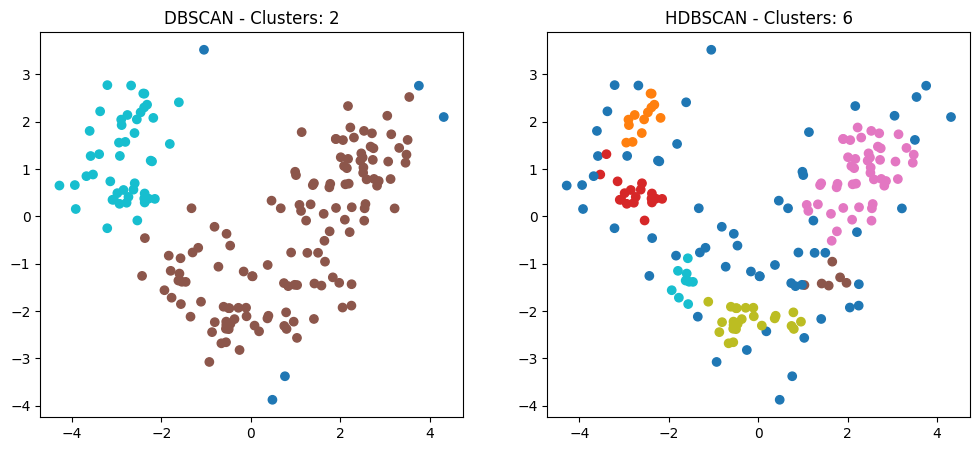

Silueta DBSCAN: 0.4783571713474489
Silueta HDBSCAN: 0.5550719488243745


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan_labels, cmap='tab10')
axs[0].set_title(f'DBSCAN - Clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}')

axs[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=hdbscan_labels, cmap='tab10')
axs[1].set_title(f'HDBSCAN - Clusters: {len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)}')

plt.show()

# Evaluación silueta (métrica)
def valid_labels(labels):
    return labels[labels != -1]

if len(set(dbscan_labels)) > 1:
    print("Silueta DBSCAN:", silhouette_score(X_reduced[dbscan_labels != -1], valid_labels(dbscan_labels)))
if len(set(hdbscan_labels)) > 1:
    print("Silueta HDBSCAN:", silhouette_score(X_reduced[hdbscan_labels != -1], valid_labels(hdbscan_labels)))

Como podemos notar, HDBSCAN es más estricto a la hora se seleccionar los puntos para la determinacion de los grupos ya que posee muchos mas outliers que DSBCAN.